In [34]:
import sklearn.datasets
import pandas as pd

df = pd.read_csv('bank-full.csv',sep = ';',encoding='mac_roman')

In [35]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [36]:
#replacing the non-numerical data points with numbers
df['poutcome'].replace(['unknown','other','failure','success'],[0,1,2,3],inplace=True)
df['y'].replace(['yes','no'],[1,0],inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,3,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0,0


Scatter plots of different features compared to y variable

<AxesSubplot:xlabel='campaign', ylabel='y'>

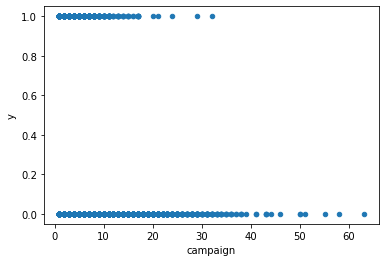

In [37]:
#Campagin: number of contacts performed during this campaign and for this client (numeric, includes last contact)
df.plot.scatter(x = 'campaign', y = 'y') 

<AxesSubplot:xlabel='pdays', ylabel='y'>

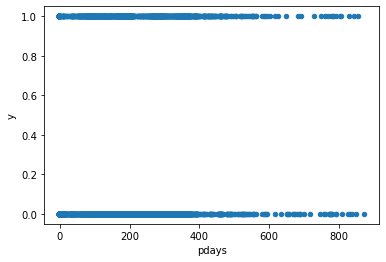

In [38]:
#pdays: number of days that passed by after the client was last contacted from a previous campaign
df.plot.scatter(x = 'pdays', y = 'y')

<AxesSubplot:xlabel='previous', ylabel='y'>

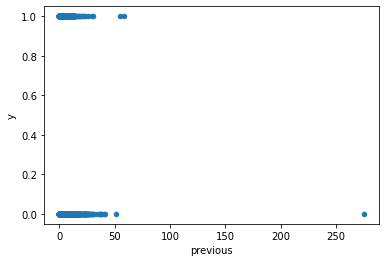

In [43]:
#previous: number of contacts performed before this campaign and for this client
df.plot.scatter(x = 'previous', y = 'y')

<AxesSubplot:xlabel='duration', ylabel='y'>

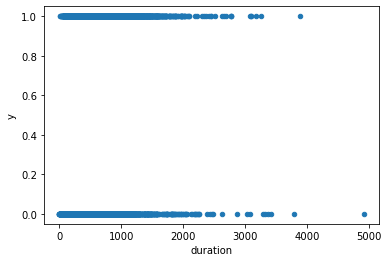

In [41]:
#duration: last contact duration, in seconds
df.plot.scatter(x = 'duration', y = 'y')

In [58]:
#Do classification with knn
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
import sklearn.neighbors


#change data into a 2-D array format
x = df[['campaign']]
y = df['y']

In [59]:
#Cross-validation to select hyperparameters for n_neighbors for k-nearest neighbors 
from sklearn.model_selection import cross_val_score

model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

loss = cross_val_score(model1,
                       x_train,
                       y_train, 
                       cv=5, 
                       scoring='neg_mean_squared_error')
loss

array([-0.12298406, -0.13567106, -0.20159432, -0.12469085, -0.12788608])

In [60]:
np.mean(np.sqrt(-loss))

0.3757492916114922

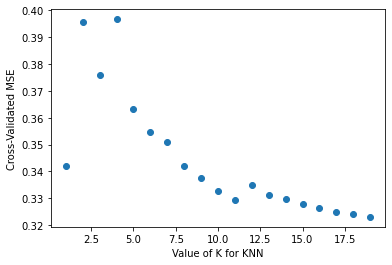

In [61]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
    loss = cross_val_score(knn,
                           x_train,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    k_scores.append(np.mean(np.sqrt(-loss)))

plt.scatter(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [62]:
def knntest(n=1):
    model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

    model1.fit(x_train,
              y_train)

    y_pred1 = model1.predict(x_test)

    print('MSE_knn = ', mean_squared_error(y_test, y_pred1))

knntest(n=19)

MSE_knn =  0.11028808803001235
